In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load iris.data
iris_data = pd.read_csv('iris.data', header=None)
iris_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

# Load bezdekIris.data
bezdek_data = pd.read_csv('bezdekIris.data', header=None)
bezdek_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

# Combine the datasets
combined_data = pd.concat([iris_data, bezdek_data], ignore_index=True)


In [3]:
# Check the first few rows of the combined dataset
print(combined_data.head())

# Check for any missing values
print(combined_data.isnull().sum())


   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


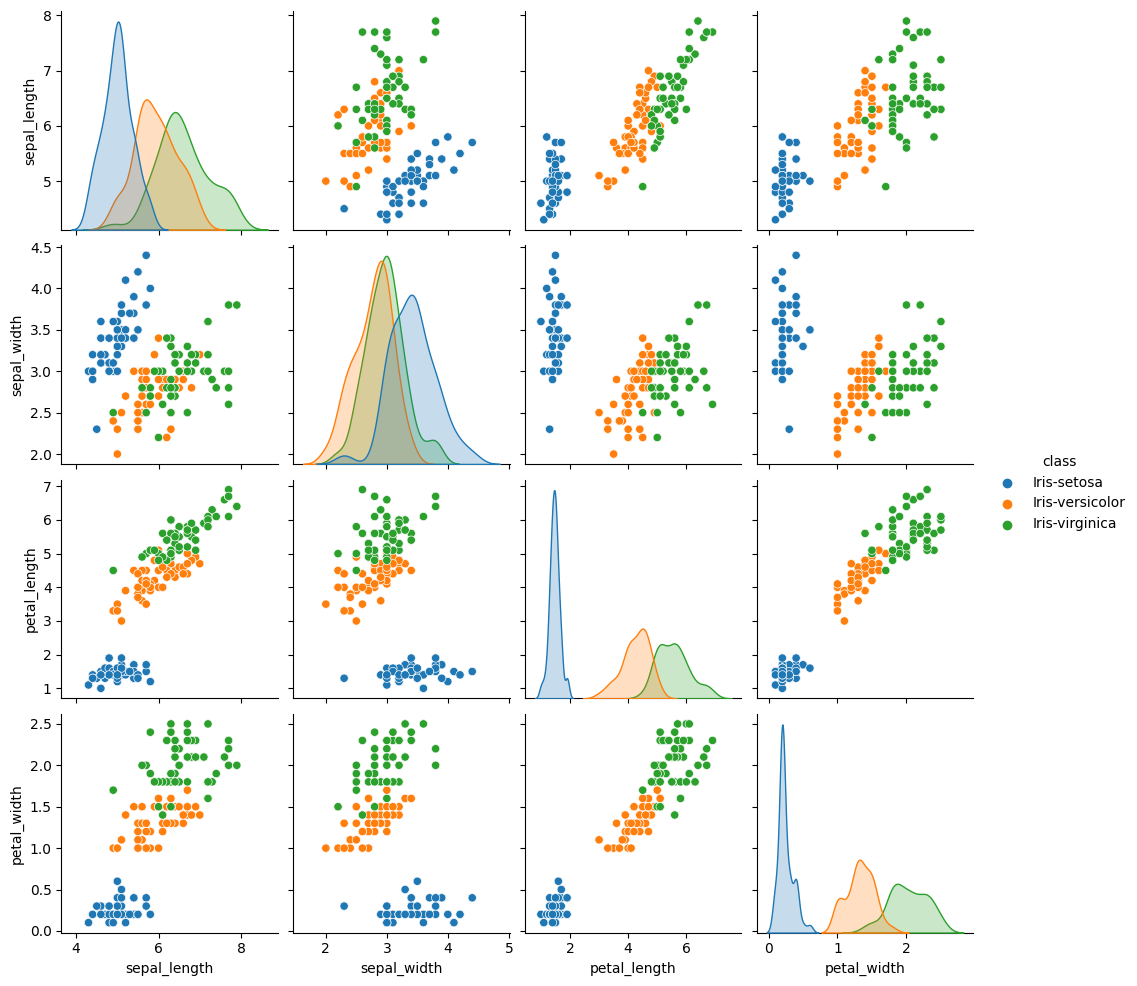

In [6]:
# Use libraries like Matplotlib or Seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Pairplot for visualization
sns.pairplot(combined_data, hue='class')
plt.show()

In [4]:
# Separate features and labels
X = combined_data.iloc[:, :-1]  # Features (all columns except the last one)
y = combined_data.iloc[:, -1]   # Label (the last column)

# Encode the labels (assuming it's the class names)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
import numpy as np
numeric_df = combined_data.select_dtypes(include=[np.number])
numeric_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.113479,0.871754,0.817947
sepal_width,-0.113479,1.000000,-0.424486,-0.361338
petal_length,0.871754,-0.424486,1.000000,0.962811
petal_width,0.817947,-0.361338,0.962811,1.000000


<Axes: >

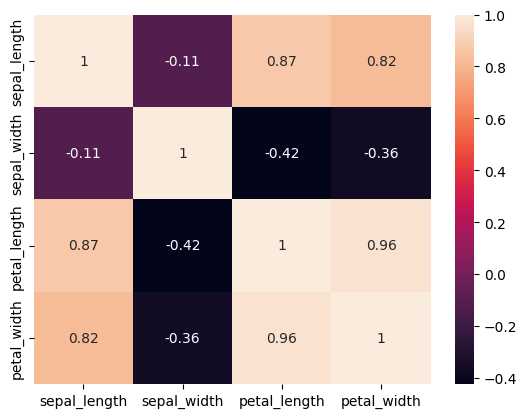

In [11]:
sns.heatmap(numeric_df.corr(),annot = True)

In [5]:
# Initializing the Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Model
rf_model.fit(X_train, y_train)

# Testing the Model
predictions = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        15

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

